In [36]:
import sys
sys.path.append('C:/Program Files/Stata17/utilities')
from pystata import config
# Try a different edition if you're not sure which one you have
config.init('se')  # Try Stata/SE instead of MP
# Or
config.init('be')  # Try Stata/BE

In [37]:
import tempfile
import os
import pandas as pd
from pystata import stata

# Step 1: Load the Stata dataset via pystata
stata.run('use "lahore2.dta", clear') 



# Optionally, run any preprocessing commands in Stata here:
# stata.run('drop if missing(some_variable)')
# stata.run('keep if condition')

# Step 2: Create a temporary CSV file for exporting data
temp_csv = tempfile.NamedTemporaryFile(delete=False, suffix=".csv")
temp_csv.close()  # Close the file so that Stata can write to it

# Export the dataset to the temporary CSV file using Stata's export command
stata.run(f'export delimited using "{temp_csv.name}", replace')

# Step 3: Read the exported CSV into a Pandas DataFrame
df = pd.read_csv(temp_csv.name,low_memory=False)

# (Optional) Remove the temporary file now that the data is loaded
os.unlink(temp_csv.name)

# Verify the data loaded correctly
print(df.head())

file C:\Users\PMLS\AppData\Local\Temp\tmptlcbu6r5.csv saved
      hhcode      psu province region district  idc relationship_to_head  \
0  218200101  2182001   punjab  urban   lahore    4         son/daughter   
1  218200101  2182001   punjab  urban   lahore    5         son/daughter   
2  218200101  2182001   punjab  urban   lahore    3         son/daughter   
3  218200104  2182001   punjab  urban   lahore    3         son/daughter   
4  218200104  2182001   punjab  urban   lahore    4         son/daughter   

      reason_for_headship  gender residence_status  ...  edu_level  \
0  main economic provider  female          present  ...        NaN   
1  main economic provider    male          present  ...        NaN   
2  main economic provider    male          present  ...        NaN   
3  main economic provider  female          present  ...        NaN   
4  main economic provider    male          present  ...        NaN   

   edu_level_num  head_gender  employment_income total_househo

In [39]:
features = [
    'age', 'birth_last_3yrs', 'born_district_type', 'born_in_district', 'can_do_math', 
    'can_read', 'can_report_income', 'can_write', 'computer_location', 'connected_to_sewerage', 
    'cooking_water_source', 'disability', 'dwelling_type', 'employment_status', 
    'first_prenatal_visit_month', 'gender', 'handwashing_water_source', 'has_computer', 
    'has_handwashing_place', 'has_internet', 'has_job', 'has_mobile', 'has_mobile_phone', 
    'has_property','total_household_income', 
    'house_owner_gender','household_ran_out_of_food', 
    'hungry_but_did_not_eat', 'income_used_for_hh','marital_status', 
    'migration_reason', 'monthly_income', 'no_computer_reason', 'no_mobile_reason', 
    'num_prenatal_visits', 'num_rooms', 'pay_for_water', 'prenatal_consultation_source', 
    'prenatal_consultations', 'property_owner_gender', 'reason_for_headship', 'region', 
    'relationship_to_head', 'residence_status', 'sick_last_2wks', 'shared_toilet', 
    'sufficient_drinking_water', 'toilet_type', 'used_computer', 'used_mobile', 
    'work_days_last_month', 'worked_last_month', 'worried_about_food', 'disability', 'has_mobile_phone',
    'house_owner_gender','years_to_complete_primary',
    'has_laptop','toilet_type','heating_fuel','head_gender','head_age','head_edu_level_num','occupancy_status','received_in_kind_income',
]


In [40]:
df.columns

Index(['hhcode', 'psu', 'province', 'region', 'district', 'idc',
       'relationship_to_head', 'reason_for_headship', 'gender',
       'residence_status',
       ...
       'edu_level', 'edu_level_num', 'head_gender', 'employment_income',
       'total_household_income', 'disability', 'head_age', 'head_edu_level',
       'head_edu_level_num', 'education_access'],
      dtype='object', length=385)

In [41]:
 # target = 'edu_access'
 # # Separate features and target variable
 # X = df[features]
 # y = df[target]


In [42]:
target = 'education_access'

# Encode target variable
y= df[target].map({'Yes': 1, 'No': 0})
X = df[features]

In [43]:
column_list = X.columns.tolist()
print(column_list)

['age', 'birth_last_3yrs', 'born_district_type', 'born_in_district', 'can_do_math', 'can_read', 'can_report_income', 'can_write', 'computer_location', 'connected_to_sewerage', 'cooking_water_source', 'disability', 'dwelling_type', 'employment_status', 'first_prenatal_visit_month', 'gender', 'handwashing_water_source', 'has_computer', 'has_handwashing_place', 'has_internet', 'has_job', 'has_mobile', 'has_mobile_phone', 'has_property', 'total_household_income', 'house_owner_gender', 'household_ran_out_of_food', 'hungry_but_did_not_eat', 'income_used_for_hh', 'marital_status', 'migration_reason', 'monthly_income', 'no_computer_reason', 'no_mobile_reason', 'num_prenatal_visits', 'num_rooms', 'pay_for_water', 'prenatal_consultation_source', 'prenatal_consultations', 'property_owner_gender', 'reason_for_headship', 'region', 'relationship_to_head', 'residence_status', 'sick_last_2wks', 'shared_toilet', 'sufficient_drinking_water', 'toilet_type', 'used_computer', 'used_mobile', 'work_days_last

In [44]:
# Encode categorical variables
X = pd.get_dummies(X)


In [45]:
X = X.loc[:, ~X.columns.duplicated()]


In [46]:
column_list = X.columns.tolist()
print(column_list)

['age', 'birth_last_3yrs', 'first_prenatal_visit_month', 'has_property', 'total_household_income', 'household_ran_out_of_food', 'hungry_but_did_not_eat', 'monthly_income', 'num_prenatal_visits', 'num_rooms', 'prenatal_consultation_source', 'prenatal_consultations', 'property_owner_gender', 'work_days_last_month', 'worried_about_food', 'years_to_complete_primary', 'head_gender', 'head_age', 'head_edu_level_num', 'born_district_type_0', 'born_district_type_rural', 'born_district_type_urban', 'born_in_district_no', 'born_in_district_yes', 'can_do_math_no', 'can_do_math_yes', 'can_read_0', 'can_read_no', 'can_read_yes', 'can_report_income_annually', 'can_report_income_monthly', 'can_report_income_recieve only in kind', 'can_write_no', 'can_write_yes', 'computer_location_  home', 'computer_location_education place', 'computer_location_others', 'computer_location_work place', 'connected_to_sewerage_no, no system', 'connected_to_sewerage_yes under ground drain', 'connected_to_sewerage_yes, to

In [47]:
duplicates = X.columns[X.columns.duplicated()]
print(duplicates)


Index([], dtype='object')


In [48]:
X = X[X.columns.drop(list(X.filter(regex='-1')))]

In [49]:
import warnings

# Ignore RuntimeWarnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [50]:
import numpy as np
np.seterr(all="ignore")  # Ignores divide-by-zero and invalid value warnings

from sklearn.preprocessing import MinMaxScaler
 # Assuming X is a pandas DataFrame
scaler = MinMaxScaler()
 # Convert the scaled array back to a DataFrame (optional)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
 # Calculate correlations
correlations = X.corrwith(y)

In [51]:
column_list = X.columns.tolist()

print(column_list)


['age', 'birth_last_3yrs', 'first_prenatal_visit_month', 'has_property', 'total_household_income', 'household_ran_out_of_food', 'hungry_but_did_not_eat', 'monthly_income', 'num_prenatal_visits', 'num_rooms', 'prenatal_consultation_source', 'prenatal_consultations', 'property_owner_gender', 'work_days_last_month', 'worried_about_food', 'years_to_complete_primary', 'head_gender', 'head_age', 'head_edu_level_num', 'born_district_type_0', 'born_district_type_rural', 'born_district_type_urban', 'born_in_district_no', 'born_in_district_yes', 'can_do_math_no', 'can_do_math_yes', 'can_read_0', 'can_read_no', 'can_read_yes', 'can_report_income_annually', 'can_report_income_monthly', 'can_report_income_recieve only in kind', 'can_write_no', 'can_write_yes', 'computer_location_  home', 'computer_location_education place', 'computer_location_others', 'computer_location_work place', 'connected_to_sewerage_no, no system', 'connected_to_sewerage_yes under ground drain', 'connected_to_sewerage_yes, to

In [52]:
 # Convert correlations to a DataFrame for better printing
corr_df = pd.DataFrame(correlations.abs().sort_values(ascending=False), columns=['Correlation'])

In [53]:
 # Print all correlations
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
 print(corr_df)


                                                    Correlation
can_read_no                                            0.434427
worked_last_month_yes                                  0.322926
can_report_income_monthly                              0.308429
income_used_for_hh_yes                                 0.299789
employment_status_yes (can't do at all)                0.287756
can_do_math_no                                         0.272481
household_ran_out_of_food                              0.193203
can_read_yes                                           0.189591
can_write_yes                                          0.189441
worried_about_food                                     0.183872
has_handwashing_place_no                               0.163335
has_handwashing_place_yes                              0.163335
has_internet_yes                                       0.162121
has_internet_no                                        0.162121
occupancy_status_owner occupied (not sel

In [54]:
 # Filter for correlations with absolute value greater than 0.01
 selected_features = correlations[abs(correlations) >= 0.01].index
 print(len(X.columns))
 print(len(selected_features))

182
140


In [55]:
 # Filter for correlations with absolute value greater than 0.05
 # Keep only the selected columns in X
 X = X[selected_features]
 print(len(X.columns))

140


In [56]:
# handling the missing values
missing_counts = X.isnull().sum()
thresh = 1000
cols_to_remove = missing_counts[missing_counts > thresh].index.tolist()
print(cols_to_remove)

['total_household_income', 'monthly_income', 'property_owner_gender', 'work_days_last_month', 'head_edu_level_num']


In [57]:
X = X.drop(columns=cols_to_remove)

In [58]:
#encoding the catagorical variables
y = pd.get_dummies(y)

In [59]:
from sklearn.model_selection import train_test_split
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Making Random Forest Model

In [60]:
import numpy as np

y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)


In [61]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Initialize the Random Forest Classifier
    # use all processors

rf_model = RandomForestClassifier(
    n_estimators=150,        
    max_depth=30,            
    min_samples_split=20,     
    min_samples_leaf=3,      
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"  # Automatically adjusts based on class imbalance
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a detailed classification report
print(classification_report(y_test, y_pred))

# Optionally, display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.8785046728971962
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       274
           1       0.93      0.92      0.93      1331

    accuracy                           0.88      1605
   macro avg       0.78      0.79      0.79      1605
weighted avg       0.88      0.88      0.88      1605

Confusion Matrix:
 [[ 183   91]
 [ 104 1227]]


                                              feature  importance
0                                                 age    0.105568
13                                        can_read_no    0.081675
6                                            head_age    0.040236
14                                       can_read_yes    0.030293
17                                      can_write_yes    0.029688
11                                     can_do_math_no    0.028294
118                             worked_last_month_yes    0.028198
116                           used_mobile_smart phone    0.027103
55                        has_job_no not seeking work    0.025817
5                                  worried_about_food    0.022900
4                                           num_rooms    0.022834
3                              hungry_but_did_not_eat    0.019298
15                          can_report_income_monthly    0.018785
130  occupancy_status_owner occupied (not self-hired)    0.018579
58        

C:\Users\PMLS\AppData\Local\Temp\ipykernel_46272\3542814801.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top30, palette="viridis")


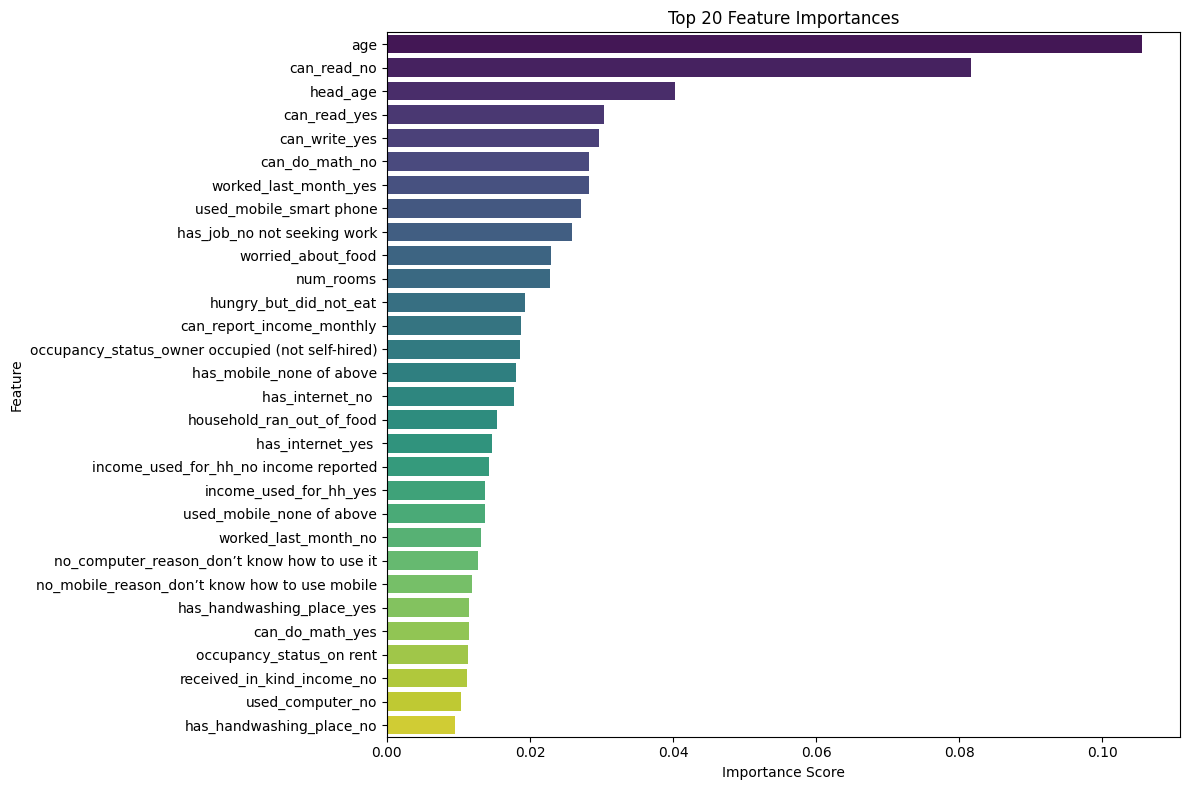

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with feature names and their corresponding importance scores
feat_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})

# Sort the DataFrame in descending order of importance
feat_importances = feat_importances.sort_values(by='importance', ascending=False)

# Get the top 20 features
top30 = feat_importances.head(30)

# Print the top 20 features
print(top30)

# Optional: visualize the top 20 features using a horizontal bar plot
plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=top30, palette="viridis")
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# SHAP  Visualizations

In [63]:
import shap

In [64]:
# explainer = shap.Explainer(model, X_train)
# shap_values = explainer.shap_values(X_test)

In [65]:
# test_data = X_test

100%|===================| 3204/3210 [08:36<00:00]        

Full SHAP values shape: (1605, 135, 2)
SHAP values for class 1 shape: (1605, 135)
Subset SHAP values shape: (300, 135)


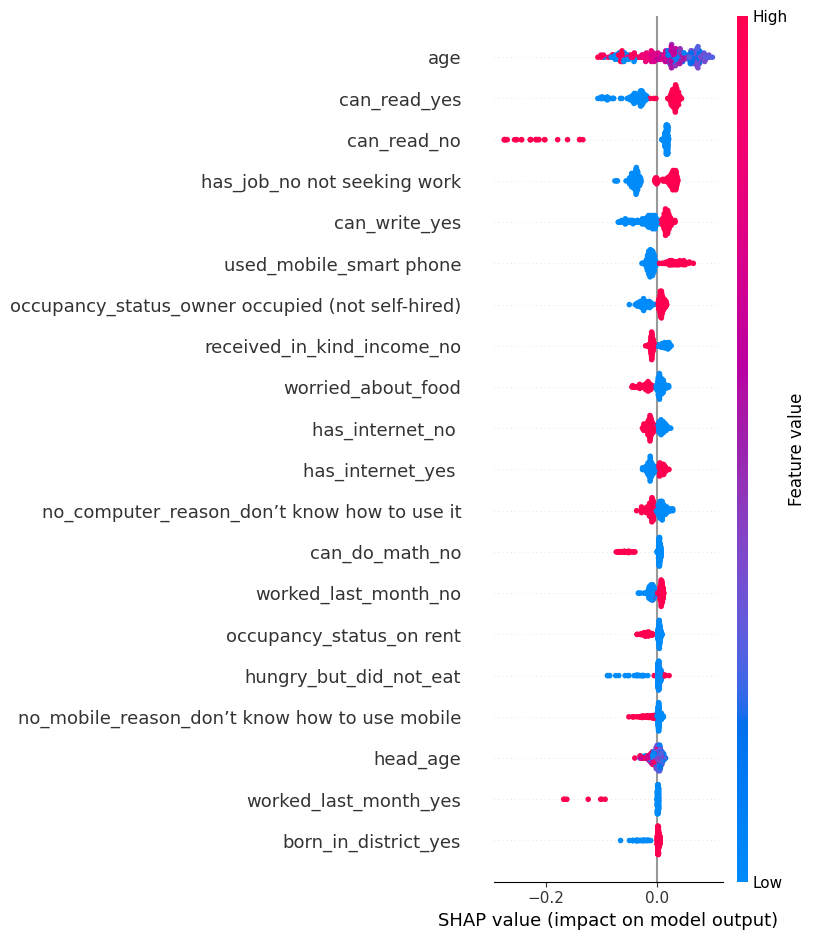

<Figure size 640x480 with 0 Axes>

In [66]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# 1. Create a subset of your test data for visualization
# -------------------------------
# Use the first 300 samples for faster plotting.
X_test_subset = X_test.iloc[:300]

# -------------------------------
# 2. Initialize the Explainer using the universal SHAP Explainer for your Random Forest model
# -------------------------------
explainer = shap.Explainer(rf_model, X_train)

# -------------------------------
# 3. Compute SHAP values on the entire test set, disabling the additivity check.
# -------------------------------
shap_values = explainer(X_test, check_additivity=False)
print("Full SHAP values shape:", shap_values.values.shape)  # Expected: (820, n_features, n_classes)

# -------------------------------
# 4. Extract SHAP values for the positive class (index 1)
# -------------------------------
shap_values_class1 = shap_values.values[:, :, 1]
print("SHAP values for class 1 shape:", shap_values_class1.shape)  # Expected: (820, n_features)

# -------------------------------
# 5. Subset the SHAP values to match the subset of test data
# -------------------------------
shap_values_subset = shap_values_class1[:300, :]
print("Subset SHAP values shape:", shap_values_subset.shape)  # Expected: (300, n_features)

# -------------------------------
# 6. Create the SHAP summary plot for feature importance using the subset
# -------------------------------
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values_subset,         # SHAP values for the positive class, subset to 300 samples
    X_test_subset,              # Subset of test data for visualization
    feature_names=X_train.columns  # Feature names from your training data
)
plt.tight_layout()
plt.savefig('shap_summary_plot.png', dpi=300)
plt.show()


100%|===================| 3209/3210 [09:19<00:00]        

Full SHAP values shape: (1605, 135, 2)
SHAP values for class 1 shape: (1605, 135)


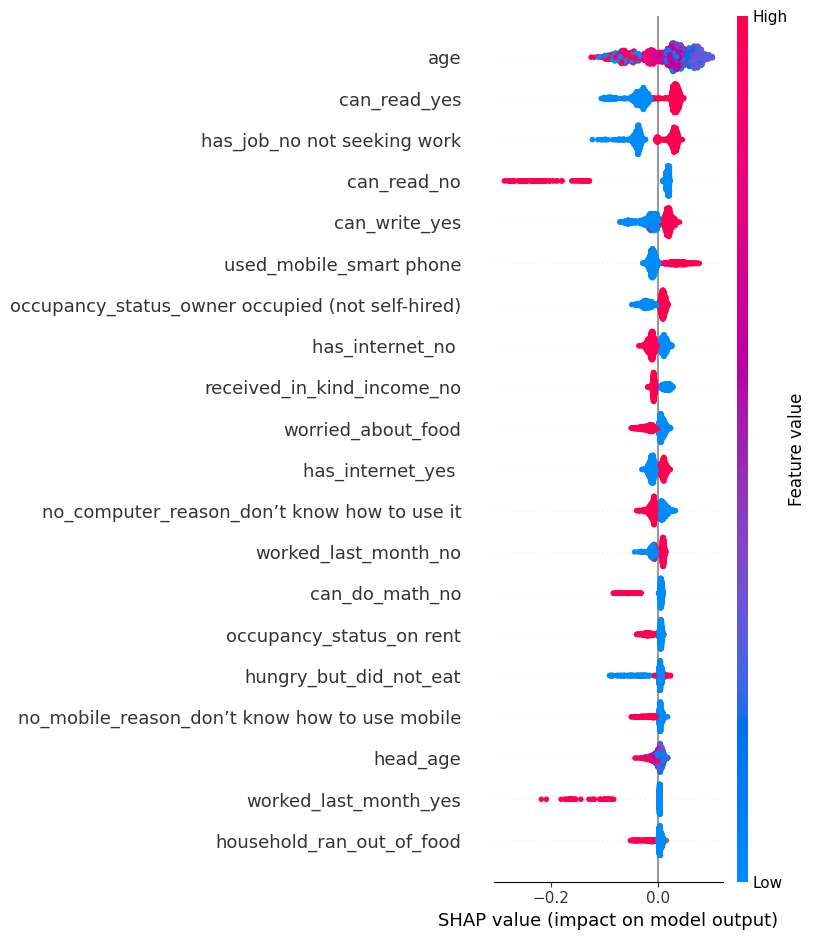

<Figure size 640x480 with 0 Axes>

In [31]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# 1. Use the entire test set for visualization
# -------------------------------
X_test_subset = X_test  # Using the entire test set

# -------------------------------
# 2. Initialize the Explainer for your Random Forest model
# -------------------------------
explainer = shap.Explainer(rf_model, X_train)
  
# -------------------------------
# 3. Compute SHAP values on the entire test set, disabling the additivity check.
# -------------------------------
shap_values = explainer(X_test, check_additivity=False)
print("Full SHAP values shape:", shap_values.values.shape)  
# Expected shape: (n_samples, n_features, n_classes) e.g. (820, 114, 2)

# -------------------------------
# 4. Extract SHAP values for the positive class (index 1)
# -------------------------------
shap_values_class1 = shap_values.values[:, :, 1]
print("SHAP values for class 1 shape:", shap_values_class1.shape)  
# Expected shape: (n_samples, n_features)

# -------------------------------
# 5. Use all SHAP values (matching the entire test set)
# -------------------------------
shap_values_subset = shap_values_class1  # using entire test set

# -------------------------------
# 6. Create the SHAP summary plot for feature importance using the full test set/

# -------------------------------
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values_subset,         # SHAP values for the positive class for all samples
    X_test_subset,              # The full test set
    feature_names=X_train.columns  # Feature names from your training data
)
plt.tight_layout()
plt.savefig('shap_summary_plot_full.png', dpi=300)
plt.show()


In [33]:
import shap
import matplotlib.pyplot as plt

# Create the SHAP summary plot and save it directly
shap.summary_plot(
    shap_values_subset,        # SHAP values
    X_test_subset,             # Corresponding input data
    feature_names=X_train.columns,  # Feature names
    show=False                 # Prevents it from displaying immediately
)

# Save the current figure in high resolution
plt.savefig('lahore_summary_plot.png', dpi=600, bbox_inches='tight')  # Increase dpi if needed
plt.close()


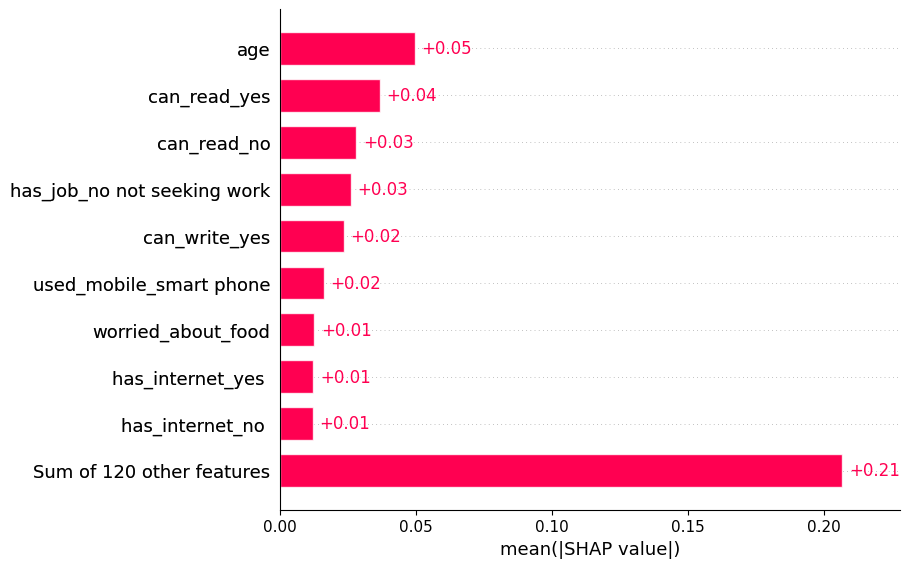

<Figure size 640x480 with 0 Axes>

In [52]:
shap_values_exp = shap.Explanation(
    values=shap_values_subset, 
    base_values=explainer.expected_value[1], 
    data=X_test_subset, 
    feature_names=X_train.columns.to_list()
)

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
shap.plots.bar(shap_values_exp)

plt.savefig('shap_bar_plot.png', dpi=150, bbox_inches='tight')  # Save the plot
plt.show()


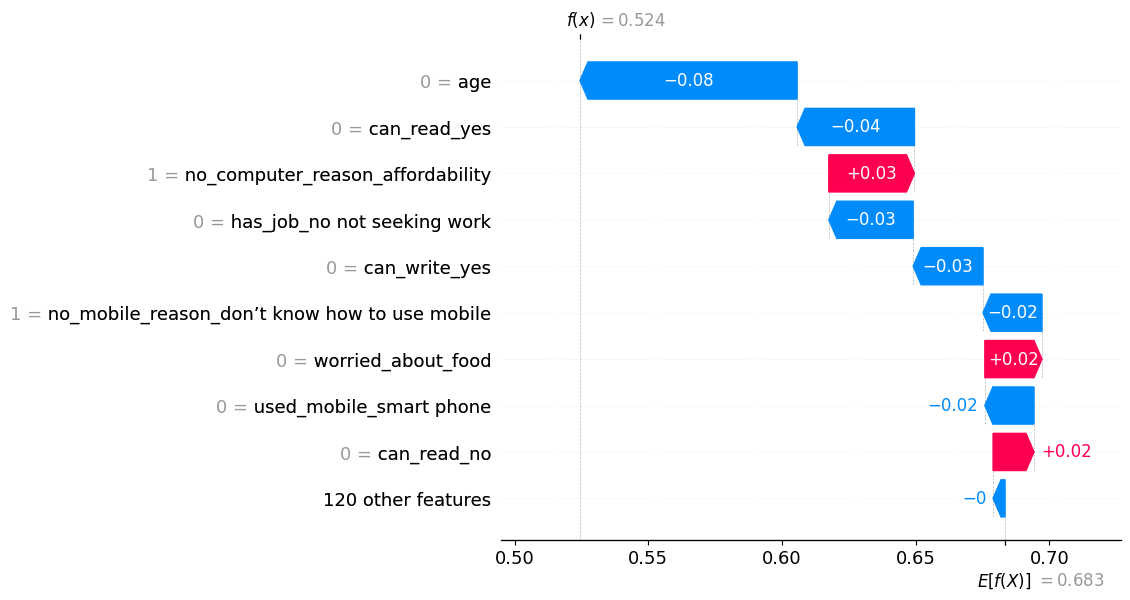

<Figure size 640x480 with 0 Axes>

In [53]:
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_subset[0],  # SHAP values for the first instance
        base_values=explainer.expected_value[1],  # Expected model output for class 1
        data=X_test_subset.iloc[0],  # Feature values for the first instance
        feature_names=X_train.columns.to_list()
    )
)
plt.savefig('shap_waterfall_plot.png', dpi=150)
plt.show()


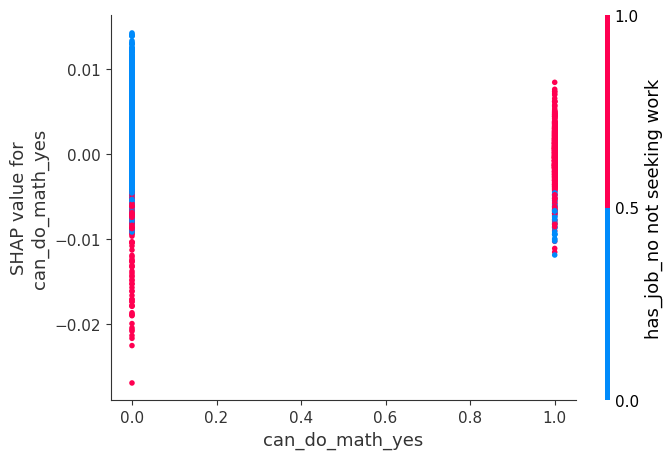

<Figure size 640x480 with 0 Axes>

In [54]:
feature_to_analyze = "can_do_math_yes"  # Replace with an actual feature name
shap.dependence_plot(
    feature_to_analyze, 
    shap_values_subset, 
    X_test_subset
)
plt.savefig(f'shap_dependence_{feature_to_analyze}.png', dpi=150)
plt.show()


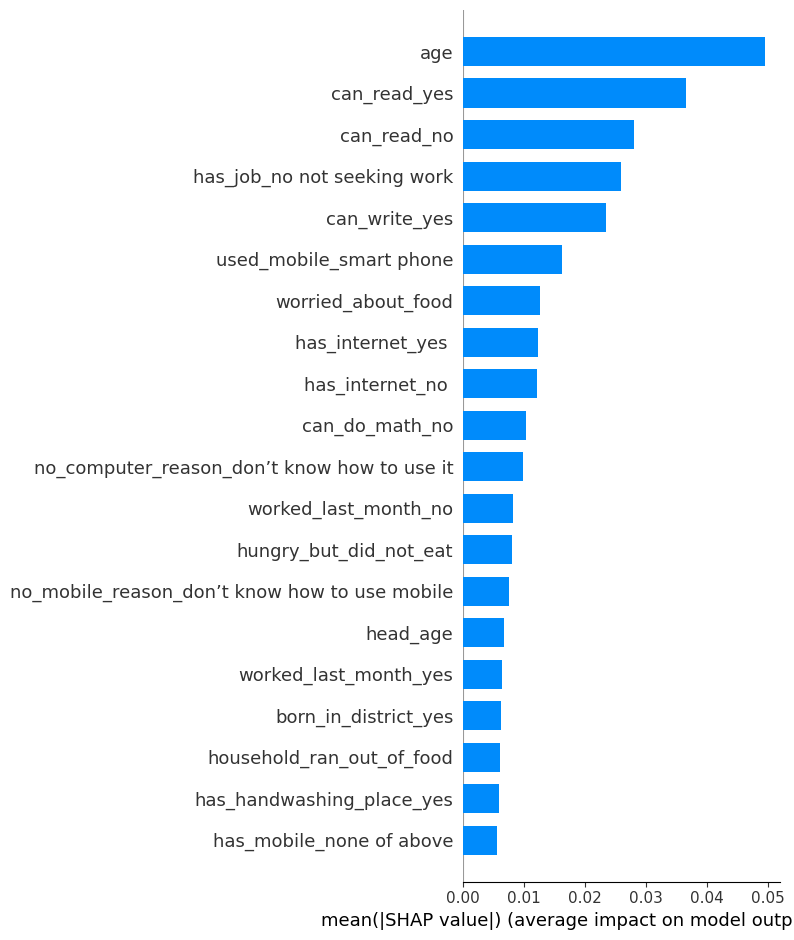

<Figure size 640x480 with 0 Axes>

In [55]:
plt.figure(figsize=(8, 6))
shap.summary_plot(
    shap_values_subset, 
    X_test_subset, 
    feature_names=X_train.columns, 
    plot_type="bar"
)
plt.tight_layout()
plt.savefig('shap_feature_importance_bar.png', dpi=150)
plt.show()


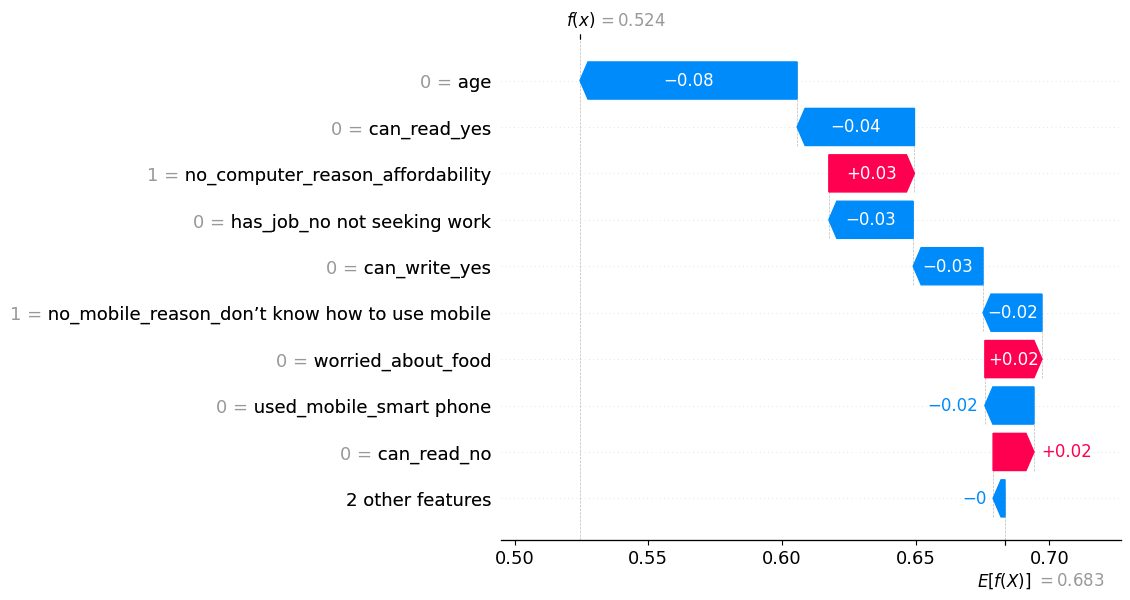

<Figure size 640x480 with 0 Axes>

In [56]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Number of top features to show in the waterfall plot
top_n = 10  

# Extract SHAP values for the first sample
shap_vals = shap_values_subset[0]
feature_names = X_train.columns.to_list()
base_value = explainer.expected_value[1]

# Sort SHAP values by absolute importance
sorted_indices = np.argsort(np.abs(shap_vals))[::-1]  # Descending order
shap_vals_sorted = shap_vals[sorted_indices]
feature_names_sorted = [feature_names[i] for i in sorted_indices]
feature_values_sorted = X_test_subset.iloc[0, sorted_indices]

# Keep only top N features, sum the rest into "Other Features"
if len(shap_vals_sorted) > top_n:
    other_features_sum = np.sum(shap_vals_sorted[top_n:])
    shap_vals_trimmed = np.append(shap_vals_sorted[:top_n], other_features_sum)
    feature_names_trimmed = feature_names_sorted[:top_n] + ["Other Features"]
    feature_values_trimmed = np.append(feature_values_sorted[:top_n], 0)  # No specific value for "Other Features"
else:
    shap_vals_trimmed = shap_vals_sorted
    feature_names_trimmed = feature_names_sorted
    feature_values_trimmed = feature_values_sorted

# Create the SHAP Waterfall Plot
shap.waterfall_plot(
    shap.Explanation(
        values=shap_vals_trimmed,
        base_values=base_value,
        data=feature_values_trimmed,
        feature_names=feature_names_trimmed
    )
)

# Save the figure
plt.savefig('shap_waterfall_plot_modified.png', dpi=150)
plt.show()


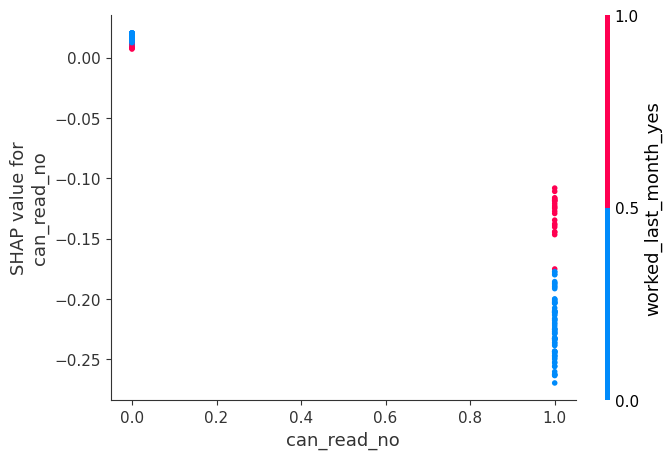

In [57]:
shap.dependence_plot("can_read_no", shap_values_subset, X_test_subset)


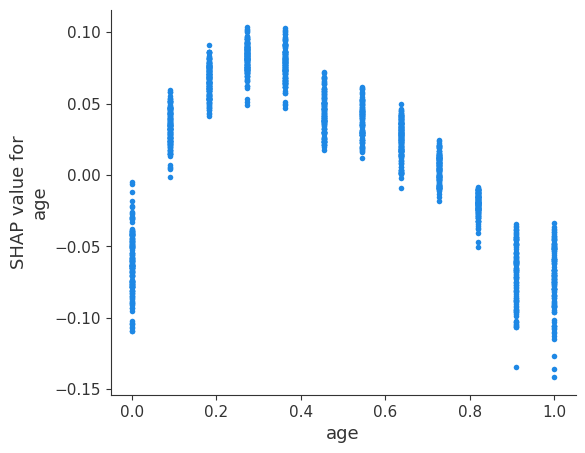

In [58]:
shap.dependence_plot("age", shap_values_subset, X_test_subset, interaction_index=None)


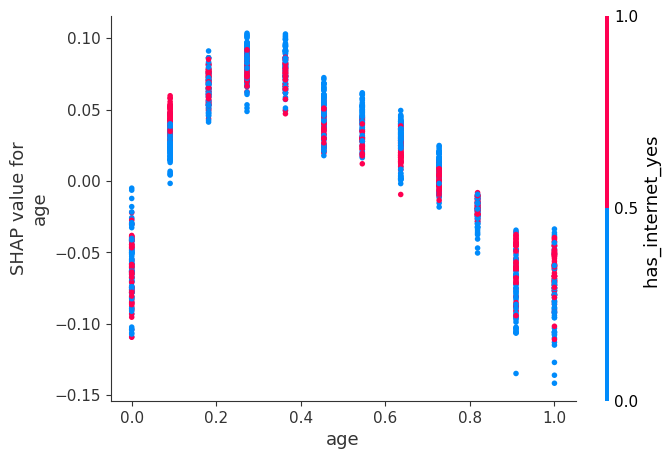

In [59]:
shap.dependence_plot("age", shap_values_subset, X_test_subset)

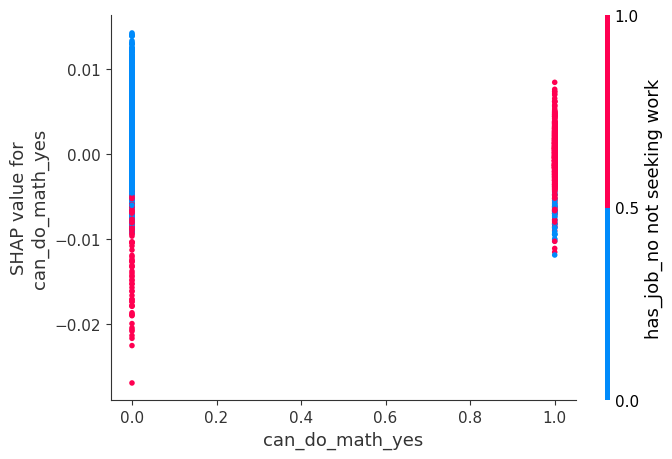

In [60]:
shap.dependence_plot("can_do_math_yes", shap_values_subset, X_test_subset)

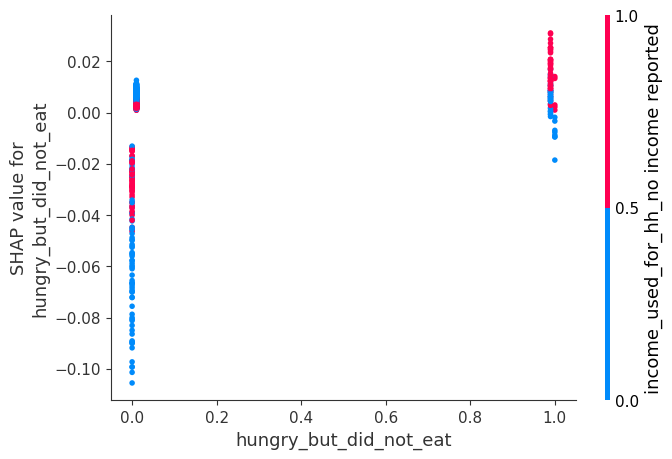

In [62]:
shap.dependence_plot("hungry_but_did_not_eat", shap_values_subset, X_test_subset)

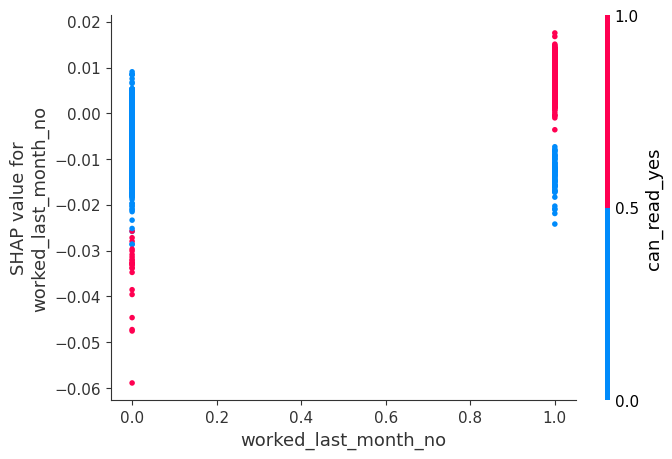

In [63]:
shap.dependence_plot("worked_last_month_no", shap_values_subset, X_test_subset)

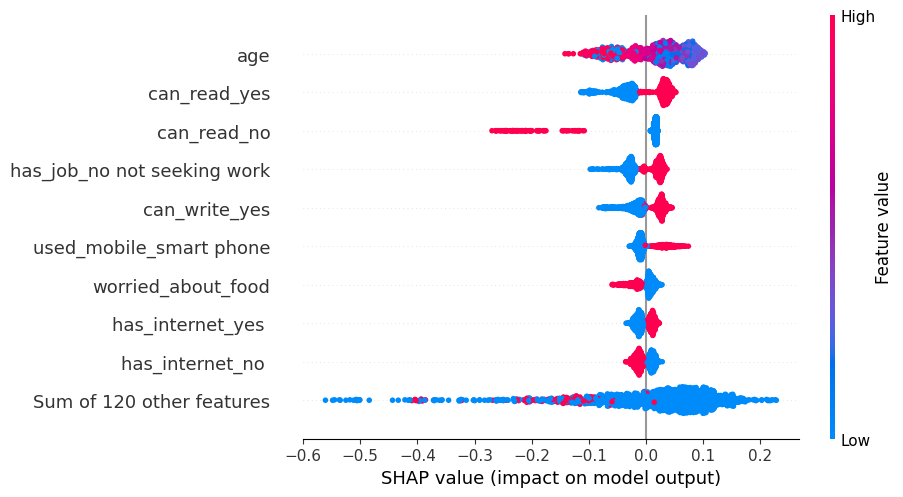

In [64]:
shap.plots.beeswarm(shap_values_exp)

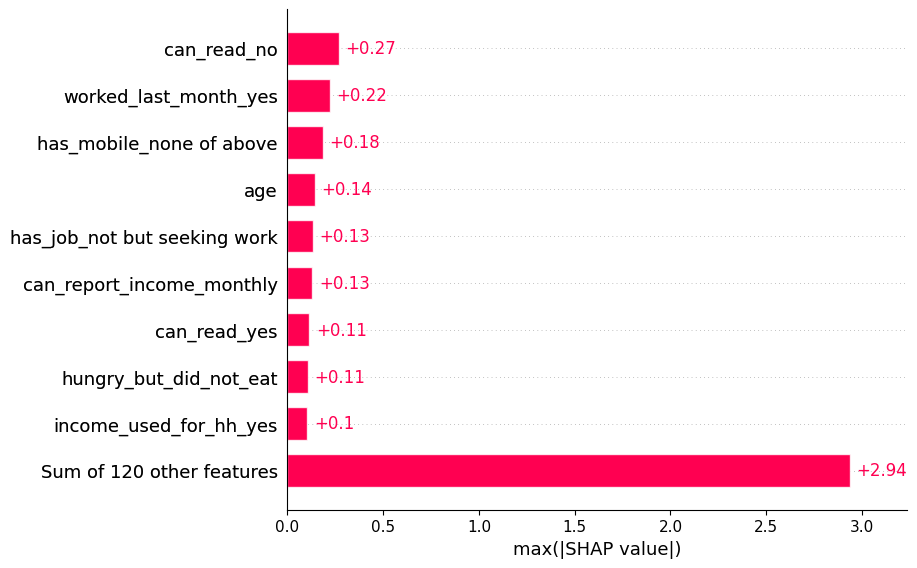

In [65]:
shap.plots.bar(shap_values_exp.abs.max(0))

In [66]:
# Create a DataFrame of SHAP values for class 1
shap_df = pd.DataFrame(shap_values_class1, columns=X_test.columns)

# Compute mean absolute SHAP value for each feature
mean_abs_shap = shap_df.abs().mean().sort_values(ascending=False)

# Get top 30 features
top_30_features = mean_abs_shap.head(30)

# Display the top 30
print("Top 30 Features by SHAP Importance (Mean Absolute Value):")
print(top_30_features)

# Optionally export to CSV
top_30_features.to_csv("top_30_shap_features.csv")


Top 30 Features by SHAP Importance (Mean Absolute Value):
age                                               0.049543
can_read_yes                                      0.036607
can_read_no                                       0.028040
has_job_no not seeking work                       0.025929
can_write_yes                                     0.023479
used_mobile_smart phone                           0.016223
worried_about_food                                0.012638
has_internet_yes                                  0.012233
has_internet_no                                   0.012162
can_do_math_no                                    0.010358
no_computer_reason_don’t know how to use it       0.009843
worked_last_month_no                              0.008245
hungry_but_did_not_eat                            0.008040
no_mobile_reason_don’t know how to use mobile     0.007569
head_age                                          0.006648
worked_last_month_yes                             0.00640